C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewed Distribution:
Upper Limit:  183.875
Lower limit:  44.875
Outliers: 
 ----------------
 High:
 No high outliers found. 
----------------
 Low:
 No low outliers found.


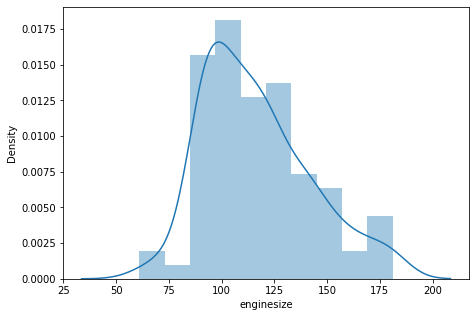

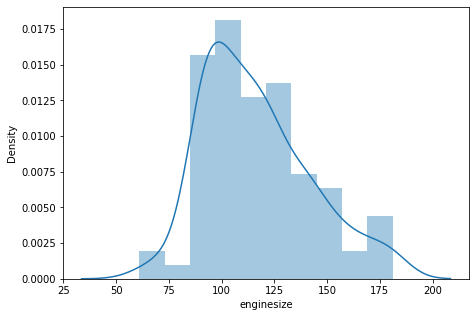

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest


data = pd.read_excel('./Data/car_data_selection.xlsx')
selection_df = pd.DataFrame(data)

#Set the confidence value
confidence = 0.05
#Set the variable for which the operations below are executed
currentVariable = 'enginesize'

#Plots the distribution of the currentVariable 
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(selection_df[currentVariable])
#sns.boxplot(selection_df[currentVariable])

#Function that returns True if variable is normally distributed, False if it is skewed. Takes in a dataframe, the target variable and the confidence value NOTE: Uses KS Test
def is_normally_distributed(df,variable, confidence):
    result = kstest(df[variable],'norm')
    if(result.pvalue < confidence): return False
    else: return True
#Function that returns a new df without the outliers based on 2 values: upper and lower limits. Takes in a dataframe, the target variable, upper and lower limit  NOTE: You can get the limits by using get_outliers_limits function
def trim_outliers(df,variable, upper,lower):
    new_df = df[(df[variable]<upper) & (df[variable] > lower)]
    return new_df
#Function that return
def get_outliers_limits(df,variable,isNormal=True):
   
        if(isNormal):
            #If dist isNormal, find the upper and lower limits using the emipirical relations of normal distribution [mean-3*sigma, mean+3*sigma]
            print('Normal Distribution:')
            upper_limit = df[variable].mean() + 3*df['horsepower'].std()
            lower_limit = df[variable].mean() - 3*df['horsepower'].std()
        else:
             #If dist is NOT normal, find the upper and lower limits using IQR [Q1 – 1.5 IQR, Q3 + 1.5 IQR ]
            print('Skewed Distribution:')    
            percentile25 = df[variable].quantile(0.25)
            percentile75 = df[variable].quantile(0.75)

            from scipy.stats import iqr
            iqr = iqr(selection_df[variable])

            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr
        

        #Get the outliers based on the upper and lower limits
        high_outliers = df[df[variable] > upper_limit]
        low_outliers = df[df[variable] < lower_limit]

        #If there are no outliers found, print message. Else, print the outliers
        if(not(high_outliers.empty)):
            high_outliers=high_outliers[variable]
        else:
            high_outliers = 'No high outliers found.'
         #If there are no outliers found, print message. Else, print the outliers
        if(not(low_outliers.empty)):
            low_outliers=low_outliers[variable]
        else:
            low_outliers = 'No low outliers found.'
        class Result:
            def __init__(self):
                self.upper_limit = upper_limit
                self.lower_limit = lower_limit
                self.high_outliers = high_outliers
                self.low_outliers = low_outliers

        return Result()
   

#Check if the variable is normally distributed. If the distribution is skewed, isNormal is set to False. 
isNormal = is_normally_distributed(selection_df, currentVariable, confidence)

result = get_outliers_limits(selection_df,currentVariable, isNormal)

print("Upper Limit: ",result.upper_limit)
print("Lower limit: ", result.lower_limit)
print("Outliers: \n","----------------\n", "High:\n", result.high_outliers, "\n----------------\n", "Low:\n", result.low_outliers)

#Trim the outliers based on found upper and lower limits. NOTE: Comment the lines below if you just want to check the outliers, without removing them
clean_df = trim_outliers(selection_df, currentVariable, result.upper_limit, result.lower_limit)

#Plots the distribution of the currentVariable after outliers were removed
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(clean_df[currentVariable])
#sns.boxplot(clean_df[currentVariable])


#Export the clean_df after outliers were removed
clean_df.to_excel('./Data/car_data_clean.xlsx', index=False)
#Rewrite the selection with the outliers removed
clean_df.to_excel('./Data/car_data_selection.xlsx', index=False)






